In [5]:
import numpy as np
import pandas as pd
import os
from dataloader import OCTDataset
import torch
from torch.utils.data import Dataset
from torchvision import transforms
import numpy as np
import pandas as pd
from PIL import Image
import argparse
import os
import copy
import matplotlib.pyplot as plt
from sklearn.metrics import balanced_accuracy_score
from sklearn.metrics import confusion_matrix
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.models as models
import torchvision.transforms as transforms
import torchvision.datasets as datasets
from torch.utils.data import DataLoader
from torch.utils.data import Subset
from torch.utils.data import ConcatDataset



root = os.getcwd()
train = os.path.join(root, "df_prime_train.csv")
test = os.path.join(root, "df_prime_test.csv")



LABELS_SEVERITY = {35: 0,
                   43: 0,
                   47: 1,
                   53: 1,
                   61: 2,
                   65: 2,
                   71: 2,
                   85: 2}

'''
def normalize_array(arr):
    """
    Normalize a 1D NumPy array to have values between 0 and 1.
    """
    arr_min = np.min(arr)
    arr_max = np.max(arr)
    normalized_arr = (arr - arr_min) / (arr_max - arr_min)
    return normalized_arr
'''


'''Obtain Dataset Images (image, label)'''


mean = (.1706)
std = (.2112)
normalize = transforms.Normalize(mean=mean, std=std)


# horizontal flip transform
transformHor = transforms.Compose([
    transforms.Resize(size=(224,224)),
    transforms.RandomHorizontalFlip(p=1.0),
    transforms.ToTensor(),
    normalize,
])

# crop transform
transformCrop = transforms.Compose([
    transforms.Resize(size=(224,224)),
    transforms.CenterCrop((224 - 25 - 25, 224)),
    transforms.ToTensor(),
    normalize
])

# blur transform
transformBlur = transforms.Compose([
    transforms.Resize(size=(224,224)),
    transforms.GaussianBlur(kernel_size=3, sigma=(0.1, 2.0)),
    transforms.ToTensor(),
    normalize
])

transform2 = transforms.Compose([
    transforms.Resize(size=(224,224)),
    transforms.ToTensor(),
    normalize,
])


args = 'C:/Users/jgril/Documents/GitHub/8803_Final_Project'

image_trainset = OCTDataset(args, 'train', transform=transform2)
image_testset = OCTDataset(args, 'test', transform=transform2)

# create augment versions of the dataset
flip_trainset = OCTDataset(args, 'train', transform=transformHor)
blur_trainset = OCTDataset(args, 'train', transform=transformBlur)
crop_trainset = OCTDataset(args, 'train', transform=transformCrop)

In [6]:
'''
# count pictures in each class for TRAINING DATA
class_counts = {}
for _, label in image_trainset:
    if label not in class_counts:
        class_counts[label] = 0
    class_counts[label] += 1

print("Training Data Class counts:", class_counts)
print()

# count pictures in each class for TESTING DATA
class_counts = {}
for _, label in image_testset:
    if label not in class_counts:
        class_counts[label] = 0
    class_counts[label] += 1

print("Testing Data Class counts:", class_counts)
print()

'''


""" For Class 0 Flip"""

# get the labels
labels = flip_trainset._labels
# create a list of indices corresponding to data points with label value 0
indices = [i for i, label in enumerate(labels) if label == 0]
# create a new dataset that only includes data points with label value 0
flip_trainset_class_0 = Subset(flip_trainset, indices)

'''
# count pictures in each class for FLIP TRAIN DATA
class_counts = {}
for _, label in flip_trainset:
    if label not in class_counts:
        class_counts[label] = 0
    class_counts[label] += 1
print("Flip Data Class 0 counts:", class_counts)

# check to see if there is only one class
unique_labels = set()
for _, label in flip_trainset_class_0:
    unique_labels.add(label)
num_classes = len(unique_labels)
print("Number of classes:", num_classes, "Total Length", len(flip_trainset_class_0))
print()
'''
""" For Class 2 Flip"""

# get the labels
labels = flip_trainset._labels
# create a list of indices corresponding to data points with label value 0
indices = [i for i, label in enumerate(labels) if label == 2]
# create a new dataset that only includes data points with label value 0
flip_trainset_class_2 = Subset(flip_trainset, indices)

'''
# count pictures in each class for FLIP TRAIN DATA
class_counts = {}
for _, label in flip_trainset_class_2:
    if label not in class_counts:
        class_counts[label] = 0
    class_counts[label] += 1

print("Flip Data Class 2 counts:", class_counts)

# check to see if there is only one class
unique_labels = set()
for _, label in flip_trainset_class_2:
    unique_labels.add(label)
num_classes = len(unique_labels)
print("Number of classes:", num_classes, "Total Length", len(flip_trainset_class_2))
print()
'''

""" For Class 0 Blur"""

# get the labels
labels = blur_trainset._labels
# create a list of indices corresponding to data points with label value 0
indices = [i for i, label in enumerate(labels) if label == 0]
# create a new dataset that only includes data points with label value 0
blur_trainset_class_0 = Subset(blur_trainset, indices)

'''
# count pictures in each class for FLIP TRAIN DATA
class_counts = {}
for _, label in blur_trainset_class_0:
    if label not in class_counts:
        class_counts[label] = 0
    class_counts[label] += 1

print("Blur Data Class 0 counts:", class_counts)

# check to see if there is only one class
unique_labels = set()
for _, label in blur_trainset_class_0:
    unique_labels.add(label)
num_classes = len(unique_labels)
print("Number of classes:", num_classes, "Total Length", len(blur_trainset_class_0))
print()
'''

""" For Class 2 Blur"""

labels = blur_trainset._labels
# create a list of indices corresponding to data points with label value 0
indices = [i for i, label in enumerate(labels) if label == 2]
# create a new dataset that only includes data points with label value 0
blur_trainset_class_2 = Subset(blur_trainset, indices)


'''
# count pictures in each class for FLIP TRAIN DATA
class_counts = {}
for _, label in blur_trainset_class_2:
    if label not in class_counts:
        class_counts[label] = 0
    class_counts[label] += 1

print("Blur Data Class 2 counts:", class_counts)

# check to see if there is only one class
unique_labels = set()
for _, label in blur_trainset_class_2:
    unique_labels.add(label)
num_classes = len(unique_labels)
print("Number of classes:", num_classes, "Total Length", len(blur_trainset_class_2))
print()
'''

# New Dataset with extra class 2 images
concatenated_dataset = ConcatDataset([image_trainset, blur_trainset_class_2])
# count pictures in each class for FLIP TRAIN DATA
class_counts = {}
for _, label in concatenated_dataset:
    if label not in class_counts:
        class_counts[label] = 0
    class_counts[label] += 1

print("Concated Data Class 2 counts:", class_counts)

# check to see if there is only one class
unique_labels = set()
for _, label in concatenated_dataset:
    unique_labels.add(label)
num_classes = len(unique_labels)
print("Number of classes:", num_classes, "Total Length", len(concatenated_dataset))


KeyboardInterrupt: 

# Plain Resnet 

In [6]:
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
from torchvision.models import resnet18

raw_train_dataset = image_trainset
test_dataset = image_testset

train_labels = [label for _, label in raw_train_dataset]

# Split the dataset into training and validation sets with stratified sampling
train_dataset, val_dataset = train_test_split(raw_train_dataset, test_size=0.2, random_state=42, stratify=train_labels)

# Parameters
batch_size = 64

lr = 0.0001
gamma = 0.001
epochs = 10

num_classes = 3 

# Load your training and validation dataset
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)


# Load the pre-trained ResNet-18 model and modify it for grayscale images
model = resnet18(pretrained=True)
num_features = model.fc.in_features
num_classes=3

#freeze layers
for param in model.parameters():
    param.requires_grad = False
model.fc.requires_grad = True


model.conv1 = nn.Conv2d(1, 64, kernel_size=3, stride=1, padding=3, bias=False)
model.fc = nn.Linear(num_features, 3)

# Define the optimizer and loss function
optimizer = optim.Adam(filter(lambda p: p.requires_grad, model.parameters()), lr=lr, weight_decay=gamma)
criterion = nn.CrossEntropyLoss()

# Train the model
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model.to(device)

train_acc = []
val_acc = []

train_losses = []
val_losses = []

# Train the model
print("Beginning Training")
for epoch in range(epochs):
    running_loss = 0.0
    correct_train = 0
    total_train = 0
    for i, (inputs, labels) in enumerate(train_loader, 0):
        inputs, labels = inputs.to(device), labels.to(device)
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
        _, predicted = torch.max(outputs.data, 1)
        total_train += labels.size(0)
        correct_train += (predicted == labels).sum().item()
        if i % 100 == 99:
            print('[%d, %5d] loss: %.3f' % (epoch + 1, i + 1, running_loss / 100))
            running_loss = 0.0
    
    # Evaluate the model on the validation set after each epoch
    correct_val = 0
    total_val = 0
    train_loss = running_loss / len(train_loader)
    val_loss = 0.0
    
    with torch.no_grad():
        for inputs, labels in val_loader:
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = model(inputs)
            _, predicted = torch.max(outputs.data, 1)
            total_val += labels.size(0)
            correct_val += (predicted == labels).sum().item()

            # calculates validation loss
            val_loss += criterion(outputs, labels).item() * inputs.size(0)
        val_loss /= len(val_dataset)

    # save accuracies and print
    train_accuracy = 100 * correct_train / total_train
    train_acc.append(train_accuracy)
    val_accuracy = 100 * correct_val / total_val
    val_acc.append(val_accuracy)
    print('Train accuracy after epoch %d: %.2f %%' % (epoch + 1, train_accuracy))
    print('Validation accuracy after epoch %d: %.2f %%' % (epoch + 1, val_accuracy))

    # save losses and print
    train_losses.append(train_loss)
    val_losses.append(val_loss)
    print('Train loss after epoch %d: %.2f' % (epoch + 1, train_loss))
    print('Validation loss after epoch %d: %.2f' % (epoch + 1, val_loss))

print('Finished Training')


c:\Users\jgril\miniconda3\lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and will be removed in 0.15, please use 'weights' instead.
  warnings.warn(
c:\Users\jgril\miniconda3\lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and will be removed in 0.15. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


Beginning Training
[1,   100] loss: 1.025
[1,   200] loss: 0.987
[1,   300] loss: 0.954
Train accuracy after epoch 1: 50.74 %
Validation accuracy after epoch 1: 54.52 %
Train loss after epoch 1: 0.01
Validation loss after epoch 1: 0.95
[2,   100] loss: 0.925
[2,   200] loss: 0.910
[2,   300] loss: 0.895
Train accuracy after epoch 2: 56.37 %
Validation accuracy after epoch 2: 57.60 %
Train loss after epoch 2: 0.01
Validation loss after epoch 2: 0.90
[3,   100] loss: 0.892
[3,   200] loss: 0.863
[3,   300] loss: 0.866
Train accuracy after epoch 3: 59.62 %
Validation accuracy after epoch 3: 59.86 %
Train loss after epoch 3: 0.01
Validation loss after epoch 3: 0.86
[4,   100] loss: 0.849
[4,   200] loss: 0.852
[4,   300] loss: 0.829
Train accuracy after epoch 4: 60.89 %
Validation accuracy after epoch 4: 61.35 %
Train loss after epoch 4: 0.01
Validation loss after epoch 4: 0.84
[5,   100] loss: 0.822
[5,   200] loss: 0.823
[5,   300] loss: 0.816
Train accuracy after epoch 5: 62.07 %
Valida

Balanced accuracy: 0.34063064431728024
Accuracy of the network on the 7987 test images: 40 %
Classification Report:
              precision    recall  f1-score   support

           0       0.45      0.37      0.40      2548
           1       0.48      0.56      0.51      3920
           2       0.11      0.10      0.10      1519

    accuracy                           0.41      7987
   macro avg       0.35      0.34      0.34      7987
weighted avg       0.40      0.41      0.40      7987

Confusion matrix:
[[ 935 1229  384]
 [ 956 2188  776]
 [ 201 1171  147]]


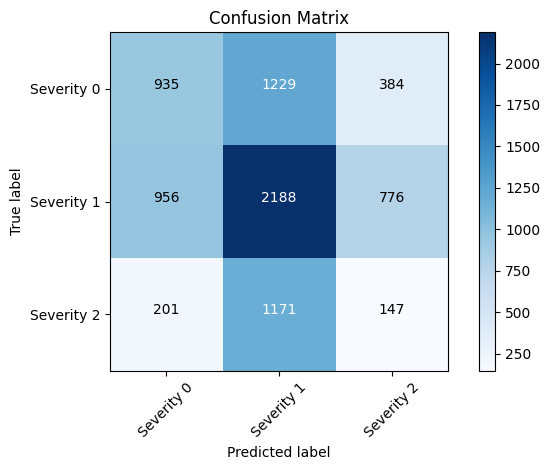

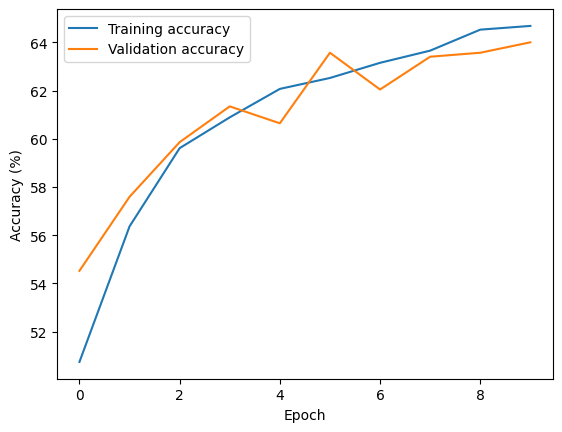

Train Accuracy:  [50.74480696871295, 56.3682284418329, 59.61548373795165, 60.893768362455546, 62.07411989072728, 62.527704757486724, 63.15653832276687, 63.661666924385344, 64.53275604350291, 64.68738724808]
Validation Accuracy:  [54.52484023912595, 57.59637188208617, 59.863945578231295, 61.34817563388992, 60.64728921871779, 63.57452071737786, 62.04906204906205, 63.40960626674912, 63.57452071737786, 64.00742115027829]



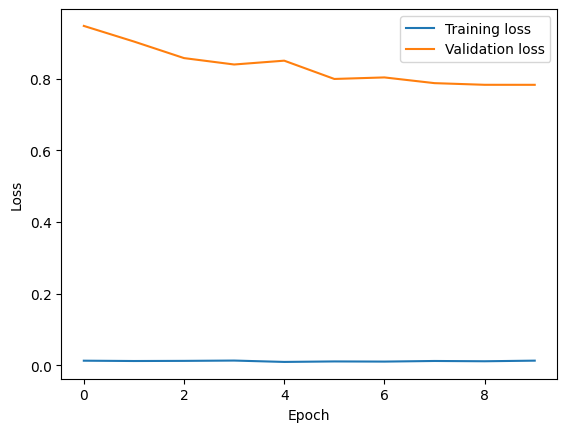

Train Losses:  [0.012416900576729523, 0.011532682337258992, 0.011911338489306601, 0.012789667436951086, 0.00899065403561843, 0.010357119339077096, 0.009917906044345153, 0.011624820726482491, 0.010841841368298782, 0.012546168542221972]
Validation Losses:  [0.9473703529165839, 0.903782840599303, 0.8575179196342786, 0.8396450226834277, 0.8503079810503266, 0.7992660549099335, 0.8035310199520707, 0.7875532835101472, 0.7829416980696225, 0.7828802690140317]



In [7]:
from sklearn.metrics import classification_report

model.eval()
total_correct = 0
total_images = 0
true_labels = []
predicted_labels = []

with torch.no_grad():
    for inputs, labels in test_loader:
        inputs, labels = inputs.to(device), labels.to(device)
        outputs = model(inputs)
        _, predicted = torch.max(outputs.data, 1)
        true_labels += labels.tolist()
        predicted_labels += predicted.tolist()
        total_images += labels.size(0)
        total_correct += (predicted == labels).sum().item()



#get balanced accuracy and regular accuracy
balanced_acc = balanced_accuracy_score(true_labels, predicted_labels)
print("Balanced accuracy:", balanced_acc)
print('Accuracy of the network on the %d test images: %d %%' % (total_images, 100 * total_correct / total_images))


# calculate recall, precision, and F1 score
report = classification_report(true_labels, predicted_labels)
print("Classification Report:")
print(report)

# create confusion matrix
cm = confusion_matrix(true_labels, predicted_labels)
print("Confusion matrix:")
print(cm)
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()
tick_marks = np.arange(num_classes)
plt.xticks(tick_marks, ['Severity 0', 'Severity 1', 'Severity 2'], rotation=45)
plt.yticks(tick_marks, ['Severity 0', 'Severity 1', 'Severity 2'])
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.tight_layout()

# Add numbers to the confusion matrix
thresh = cm.max() / 2.
for i in range(num_classes):
    for j in range(num_classes):
        plt.text(j, i, format(cm[i, j], 'd'),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

plt.tight_layout()
plt.show()



# Plot the training and validation accuracy
plt.plot(train_acc, label='Training accuracy')
plt.plot(val_acc, label='Validation accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy (%)')
plt.legend()
plt.show()
print("Train Accuracy: ", train_acc)
print("Validation Accuracy: ", val_acc)
print()


# Plot losses
plt.plot(range(epochs), train_losses, label='Training loss')
plt.plot(range(epochs), val_losses, label='Validation loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()
print("Train Losses: ", train_losses)
print("Validation Losses: ", val_losses)
print()

## Resnet with Crop Dataset

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
from torchvision.models import resnet18

raw_train_dataset = image_trainset
test_dataset = image_testset

train_labels = [label for _, label in raw_train_dataset]

# Split the dataset into training and validation sets with stratified sampling
train_dataset, val_dataset = train_test_split(raw_train_dataset, test_size=0.2, random_state=42, stratify=train_labels)

# Parameters
batch_size = 64

lr = 0.0001
gamma = 0.001
epochs = 10

num_classes = 3 

# Load your training and validation dataset
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)


# Load the pre-trained ResNet-18 model and modify it for grayscale images
model = resnet18(pretrained=True)
num_features = model.fc.in_features
num_classes=3

#freeze layers
for param in model.parameters():
    param.requires_grad = False
model.fc.requires_grad = True


model.conv1 = nn.Conv2d(1, 64, kernel_size=3, stride=1, padding=3, bias=False)
model.fc = nn.Linear(num_features, 3)

# Define the optimizer and loss function
optimizer = optim.Adam(filter(lambda p: p.requires_grad, model.parameters()), lr=lr, weight_decay=gamma)
criterion = nn.CrossEntropyLoss()

# Train the model
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model.to(device)

train_acc = []
val_acc = []

train_losses = []
val_losses = []

# Train the model
print("Beginning Training")
for epoch in range(epochs):
    running_loss = 0.0
    correct_train = 0
    total_train = 0
    for i, (inputs, labels) in enumerate(train_loader, 0):
        inputs, labels = inputs.to(device), labels.to(device)
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
        _, predicted = torch.max(outputs.data, 1)
        total_train += labels.size(0)
        correct_train += (predicted == labels).sum().item()
        if i % 100 == 99:
            print('[%d, %5d] loss: %.3f' % (epoch + 1, i + 1, running_loss / 100))
            running_loss = 0.0
    
    # Evaluate the model on the validation set after each epoch
    correct_val = 0
    total_val = 0
    train_loss = running_loss / len(train_loader)
    val_loss = 0.0
    
    with torch.no_grad():
        for inputs, labels in val_loader:
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = model(inputs)
            _, predicted = torch.max(outputs.data, 1)
            total_val += labels.size(0)
            correct_val += (predicted == labels).sum().item()

            # calculates validation loss
            val_loss += criterion(outputs, labels).item() * inputs.size(0)
        val_loss /= len(val_dataset)

    # save accuracies and print
    train_accuracy = 100 * correct_train / total_train
    train_acc.append(train_accuracy)
    val_accuracy = 100 * correct_val / total_val
    val_acc.append(val_accuracy)
    print('Train accuracy after epoch %d: %.2f %%' % (epoch + 1, train_accuracy))
    print('Validation accuracy after epoch %d: %.2f %%' % (epoch + 1, val_accuracy))

    # save losses and print
    train_losses.append(train_loss)
    val_losses.append(val_loss)
    print('Train loss after epoch %d: %.2f' % (epoch + 1, train_loss))
    print('Validation loss after epoch %d: %.2f' % (epoch + 1, val_loss))

print('Finished Training')

from sklearn.metrics import classification_report

model.eval()
total_correct = 0
total_images = 0
true_labels = []
predicted_labels = []

with torch.no_grad():
    for inputs, labels in test_loader:
        inputs, labels = inputs.to(device), labels.to(device)
        outputs = model(inputs)
        _, predicted = torch.max(outputs.data, 1)
        true_labels += labels.tolist()
        predicted_labels += predicted.tolist()
        total_images += labels.size(0)
        total_correct += (predicted == labels).sum().item()



#get balanced accuracy and regular accuracy
balanced_acc = balanced_accuracy_score(true_labels, predicted_labels)
print("Balanced accuracy:", balanced_acc)
print('Accuracy of the network on the %d test images: %d %%' % (total_images, 100 * total_correct / total_images))


# calculate recall, precision, and F1 score
report = classification_report(true_labels, predicted_labels)
print("Classification Report:")
print(report)

# create confusion matrix
cm = confusion_matrix(true_labels, predicted_labels)
print("Confusion matrix:")
print(cm)
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()
tick_marks = np.arange(num_classes)
plt.xticks(tick_marks, ['Severity 0', 'Severity 1', 'Severity 2'], rotation=45)
plt.yticks(tick_marks, ['Severity 0', 'Severity 1', 'Severity 2'])
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.tight_layout()

# Add numbers to the confusion matrix
thresh = cm.max() / 2.
for i in range(num_classes):
    for j in range(num_classes):
        plt.text(j, i, format(cm[i, j], 'd'),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

plt.tight_layout()
plt.show()



# Plot the training and validation accuracy
plt.plot(train_acc, label='Training accuracy')
plt.plot(val_acc, label='Validation accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy (%)')
plt.legend()
plt.show()
print("Train Accuracy: ", train_acc)
print("Validation Accuracy: ", val_acc)
print()


# Plot losses
plt.plot(range(epochs), train_losses, label='Training loss')
plt.plot(range(epochs), val_losses, label='Validation loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()
print("Train Losses: ", train_losses)
print("Validation Losses: ", val_losses)
print()